<a href="https://colab.research.google.com/github/5rangeclick/DL/blob/CV/08_2_largescale_preprocessing(%EB%82%98%EC%9D%98%EC%8B%A4%ED%97%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Large_Scale_Preprocessing(대용량 이미지 전처리)

## Download Dataset(캐글에서 데이터셋 다운로드받기)

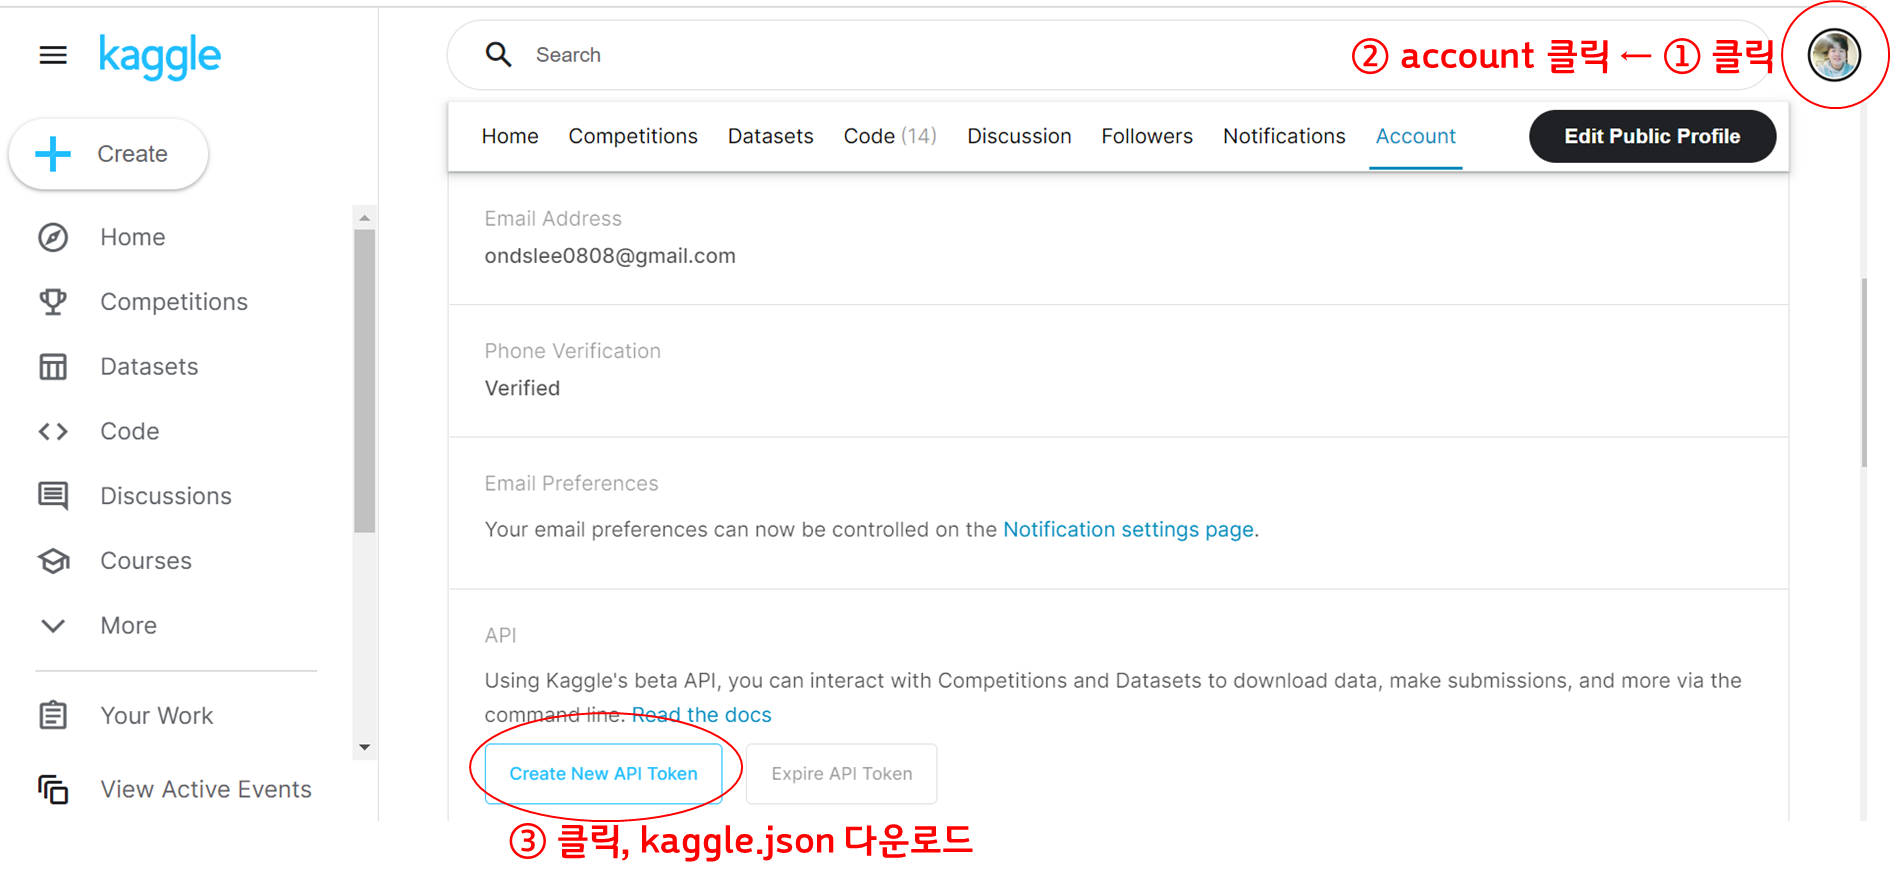

In [18]:
# 캐글 설치
!pip install -q kaggle

- kaggle.json 파일이 현재 content 경로에 있음
- root/.kaggle 폴더로 이동시켜줘야 함
--------------------------------
- root는 ~로 표시함
- .kaggle폴더는 없기 때문에 우리가 직접 만들어줘야함

In [19]:

# .kaggle 폴더 생성
!mkdir -p ~/.kaggle/ #물결: 루트 경로.
# kaggle.josn .kaggle로 복사
!cp kaggle.json ~/.kaggle/ #copy a b: a를 b에 붙여넣어라 (cp=카피)
# 해당 폴더 목록 확인(복사 잘 되었는지 확인)
!ls ~/.kaggle

kaggle.json


- root 경로에 .kaggle폴더가 잘 만들어졌는지 확인하고 싶다면
- root경로의 목록에 .kaggle폴더가 있는지 확인만 하면 됨
-----------
1) root경로로 이동 (cd ~)   
2) root 경로의 목록을 확인 (!ls -a)

In [20]:
#캐글에 있는 데이터를 명령어로 다운 받는 중

In [21]:
!cd ~/ # 경로 이동 (~:루트경로로 이동)

In [22]:
!ls -a # 해당 경로 목록 전부(-a: 숨김파일까지) 확인

.  ..  .config	kaggle.json  sample_data


In [23]:
!ls ~/.kaggle -al # 해당 경로 목록 상세정보까지(-al: 권한정보, 날짜) 확인 #kaggle.json의 권한은 '-rw-r--r--'이다. read, 실행, write 세 가지의 권한값이 600으로 수정되어야 함.

total 16
drwxr-xr-x 2 root root 4096 Jul  5 07:04 .
drwx------ 1 root root 4096 Jul  5 07:02 ..
-rw-r--r-- 1 root root   66 Jul  5 07:04 kaggle.json


In [24]:
# 파일 권한 변경 : 읽기, 쓰기, 실행 (rwx) #600이라는 권한으로 바꿔라. 8진법. 소유자 6, 소유그룹 0, others 0 (0: 권한을 안 준다 ==> 600: 소유자에게만 권한을 주겠다. 6을 이진법으로 바꾸면 110 (4+2+0). = 읽기 쓰기는 되고 실행은 안된다)
!chmod 600 ~/.kaggle/kaggle.json #600 = 110(소유자=6) 000(소유그룹=0) 000 (others=0)

1) 파일권한 : 읽기, 쓰기, 실행 (rwx)  
2) 대상 : 소유자, 소유그룹, others  
3) 권한 표시 : 2진법을 8진법으로  
- 권한부여는 1, x는 0
- rwx 모두 부여는 111 -> 7
- rwx 모두 미부여는 000 -> 0


In [25]:
!ls .kaggle -al

ls: cannot access '.kaggle': No such file or directory


In [26]:
cd /content

/content


In [27]:
!ls

kaggle.json  sample_data


In [28]:
!ls -a

.  ..  .config	kaggle.json  sample_data


In [ ]:
#위의 셀 4개는 상대경로에 대한 거?

In [29]:
!pwd #현재의 워킹 디렉토리 출력

/content


In [30]:
#downloading dataset ==> 위에서 cd /content해놓고 다운받기. 컨텐트 경로로 안해놓으면 루트에 다운이 된다.
!kaggle datasets download -d prasunroy/natural-images

 95% 324M/342M [00:01<00:00, 224MB/s]
100% 342M/342M [00:01<00:00, 223MB/s]


In [31]:
!unzip -q natural-images.zip

In [32]:
import os

import cv2
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

import pickle

from sklearn.model_selection import train_test_split

In [33]:
folder_path = '/content/natural_images'
label_names = os.listdir(folder_path)
label_names

['fruit', 'car', 'airplane', 'person', 'cat', 'motorbike', 'flower', 'dog']

In [34]:
os.listdir(folder_path + '/airplane')

['airplane_0617.jpg',
 'airplane_0243.jpg',
 'airplane_0588.jpg',
 'airplane_0439.jpg',
 'airplane_0377.jpg',
 'airplane_0544.jpg',
 'airplane_0398.jpg',
 'airplane_0017.jpg',
 'airplane_0427.jpg',
 'airplane_0350.jpg',
 'airplane_0470.jpg',
 'airplane_0629.jpg',
 'airplane_0246.jpg',
 'airplane_0012.jpg',
 'airplane_0486.jpg',
 'airplane_0378.jpg',
 'airplane_0157.jpg',
 'airplane_0112.jpg',
 'airplane_0155.jpg',
 'airplane_0506.jpg',
 'airplane_0505.jpg',
 'airplane_0445.jpg',
 'airplane_0229.jpg',
 'airplane_0644.jpg',
 'airplane_0304.jpg',
 'airplane_0158.jpg',
 'airplane_0601.jpg',
 'airplane_0252.jpg',
 'airplane_0584.jpg',
 'airplane_0320.jpg',
 'airplane_0681.jpg',
 'airplane_0074.jpg',
 'airplane_0340.jpg',
 'airplane_0583.jpg',
 'airplane_0082.jpg',
 'airplane_0494.jpg',
 'airplane_0132.jpg',
 'airplane_0694.jpg',
 'airplane_0032.jpg',
 'airplane_0027.jpg',
 'airplane_0299.jpg',
 'airplane_0163.jpg',
 'airplane_0358.jpg',
 'airplane_0280.jpg',
 'airplane_0206.jpg',
 'airplane

In [36]:
dataset = {} # 카테고리명 : [이미지1경로, 이미지2경로, ...]

for label in os.listdir(folder_path):
    # sub_path = folder_path+'/'+label+'/'
    dataset[label] = os.listdir(folder_path +'/' +label) # dataset = {'motorbike' : []}

dataset

{'fruit': ['fruit_0474.jpg',
  'fruit_0349.jpg',
  'fruit_0057.jpg',
  'fruit_0634.jpg',
  'fruit_0549.jpg',
  'fruit_0408.jpg',
  'fruit_0740.jpg',
  'fruit_0824.jpg',
  'fruit_0756.jpg',
  'fruit_0957.jpg',
  'fruit_0279.jpg',
  'fruit_0205.jpg',
  'fruit_0641.jpg',
  'fruit_0962.jpg',
  'fruit_0319.jpg',
  'fruit_0161.jpg',
  'fruit_0186.jpg',
  'fruit_0593.jpg',
  'fruit_0493.jpg',
  'fruit_0384.jpg',
  'fruit_0834.jpg',
  'fruit_0789.jpg',
  'fruit_0642.jpg',
  'fruit_0591.jpg',
  'fruit_0006.jpg',
  'fruit_0348.jpg',
  'fruit_0304.jpg',
  'fruit_0005.jpg',
  'fruit_0059.jpg',
  'fruit_0061.jpg',
  'fruit_0652.jpg',
  'fruit_0470.jpg',
  'fruit_0913.jpg',
  'fruit_0510.jpg',
  'fruit_0402.jpg',
  'fruit_0038.jpg',
  'fruit_0862.jpg',
  'fruit_0375.jpg',
  'fruit_0928.jpg',
  'fruit_0126.jpg',
  'fruit_0579.jpg',
  'fruit_0371.jpg',
  'fruit_0231.jpg',
  'fruit_0741.jpg',
  'fruit_0103.jpg',
  'fruit_0550.jpg',
  'fruit_0907.jpg',
  'fruit_0748.jpg',
  'fruit_0120.jpg',
  'fruit_01

In [ ]:
# 카테고리별로 이미지파일 경로 리스트 사전 만들기
# keys : 카테고리명
# values : 리스트 of 이미지 경로들
dataset = {} # 카테고리명 : [이미지1경로, 이미지2경로, ...]

#라벨이 키가 되고 밸류는 리스트가 되어야 함. 첫번째 라벨에 대해서 빈 리스트 만들고 리스트 채워주고. 리스트든 딕셔너리든 이중자료구조로 저장하고 싶다면 이중포문을 써야한다.




dataset

{'fruit': ['/content/natural_images/fruit/fruit_0188.jpg',
  '/content/natural_images/fruit/fruit_0349.jpg',
  '/content/natural_images/fruit/fruit_0664.jpg',
  '/content/natural_images/fruit/fruit_0327.jpg',
  '/content/natural_images/fruit/fruit_0869.jpg',
  '/content/natural_images/fruit/fruit_0172.jpg',
  '/content/natural_images/fruit/fruit_0769.jpg',
  '/content/natural_images/fruit/fruit_0782.jpg',
  '/content/natural_images/fruit/fruit_0529.jpg',
  '/content/natural_images/fruit/fruit_0334.jpg',
  '/content/natural_images/fruit/fruit_0352.jpg',
  '/content/natural_images/fruit/fruit_0891.jpg',
  '/content/natural_images/fruit/fruit_0692.jpg',
  '/content/natural_images/fruit/fruit_0062.jpg',
  '/content/natural_images/fruit/fruit_0532.jpg',
  '/content/natural_images/fruit/fruit_0212.jpg',
  '/content/natural_images/fruit/fruit_0466.jpg',
  '/content/natural_images/fruit/fruit_0954.jpg',
  '/content/natural_images/fruit/fruit_0254.jpg',
  '/content/natural_images/fruit/fruit_07

In [129]:
for label in label_names:
    print(label)

fruit
car
airplane
person
cat
motorbike
flower
dog


In [130]:
folder_path

'/content/natural_images'

In [164]:
dataset = {}
file_names = []

for label in label_names:
    file_names.append(os.listdir(folder_path + '/' + label))

dataset = dict(zip(label_names, file_names))
print(dataset)

{'fruit': ['fruit_0474.jpg', 'fruit_0349.jpg', 'fruit_0057.jpg', 'fruit_0634.jpg', 'fruit_0549.jpg', 'fruit_0408.jpg', 'fruit_0740.jpg', 'fruit_0824.jpg', 'fruit_0756.jpg', 'fruit_0957.jpg', 'fruit_0279.jpg', 'fruit_0205.jpg', 'fruit_0641.jpg', 'fruit_0962.jpg', 'fruit_0319.jpg', 'fruit_0161.jpg', 'fruit_0186.jpg', 'fruit_0593.jpg', 'fruit_0493.jpg', 'fruit_0384.jpg', 'fruit_0834.jpg', 'fruit_0789.jpg', 'fruit_0642.jpg', 'fruit_0591.jpg', 'fruit_0006.jpg', 'fruit_0348.jpg', 'fruit_0304.jpg', 'fruit_0005.jpg', 'fruit_0059.jpg', 'fruit_0061.jpg', 'fruit_0652.jpg', 'fruit_0470.jpg', 'fruit_0913.jpg', 'fruit_0510.jpg', 'fruit_0402.jpg', 'fruit_0038.jpg', 'fruit_0862.jpg', 'fruit_0375.jpg', 'fruit_0928.jpg', 'fruit_0126.jpg', 'fruit_0579.jpg', 'fruit_0371.jpg', 'fruit_0231.jpg', 'fruit_0741.jpg', 'fruit_0103.jpg', 'fruit_0550.jpg', 'fruit_0907.jpg', 'fruit_0748.jpg', 'fruit_0120.jpg', 'fruit_0102.jpg', 'fruit_0541.jpg', 'fruit_0973.jpg', 'fruit_0237.jpg', 'fruit_0435.jpg', 'fruit_0166.jpg',

In [153]:
dataset = {}
list = []
pathlist=[]

for label in label_names:
    list.append(os.listdir(folder_path + '/' + label))

    for i in list:
        for img in i:
            pathlist.append(folder_path + '/' + label + '/' + img)

dataset = dict(zip(label_names, pathlist))
print(dataset)

#카테고리당 전체가 들어오지 못하고 fruit만 카테고리마다 하나씩 들어가버림

{'fruit': '/content/natural_images/fruit/fruit_0474.jpg', 'car': '/content/natural_images/fruit/fruit_0349.jpg', 'airplane': '/content/natural_images/fruit/fruit_0057.jpg', 'person': '/content/natural_images/fruit/fruit_0634.jpg', 'cat': '/content/natural_images/fruit/fruit_0549.jpg', 'motorbike': '/content/natural_images/fruit/fruit_0408.jpg', 'flower': '/content/natural_images/fruit/fruit_0740.jpg', 'dog': '/content/natural_images/fruit/fruit_0824.jpg'}


In [166]:
pathlist

['/content/natural_images/fruit/fruit_0474.jpg',
 '/content/natural_images/fruit/fruit_0349.jpg',
 '/content/natural_images/fruit/fruit_0057.jpg',
 '/content/natural_images/fruit/fruit_0634.jpg',
 '/content/natural_images/fruit/fruit_0549.jpg',
 '/content/natural_images/fruit/fruit_0408.jpg',
 '/content/natural_images/fruit/fruit_0740.jpg',
 '/content/natural_images/fruit/fruit_0824.jpg',
 '/content/natural_images/fruit/fruit_0756.jpg',
 '/content/natural_images/fruit/fruit_0957.jpg',
 '/content/natural_images/fruit/fruit_0279.jpg',
 '/content/natural_images/fruit/fruit_0205.jpg',
 '/content/natural_images/fruit/fruit_0641.jpg',
 '/content/natural_images/fruit/fruit_0962.jpg',
 '/content/natural_images/fruit/fruit_0319.jpg',
 '/content/natural_images/fruit/fruit_0161.jpg',
 '/content/natural_images/fruit/fruit_0186.jpg',
 '/content/natural_images/fruit/fruit_0593.jpg',
 '/content/natural_images/fruit/fruit_0493.jpg',
 '/content/natural_images/fruit/fruit_0384.jpg',
 '/content/natural_i

In [151]:
list

[['fruit_0474.jpg',
  'fruit_0349.jpg',
  'fruit_0057.jpg',
  'fruit_0634.jpg',
  'fruit_0549.jpg',
  'fruit_0408.jpg',
  'fruit_0740.jpg',
  'fruit_0824.jpg',
  'fruit_0756.jpg',
  'fruit_0957.jpg',
  'fruit_0279.jpg',
  'fruit_0205.jpg',
  'fruit_0641.jpg',
  'fruit_0962.jpg',
  'fruit_0319.jpg',
  'fruit_0161.jpg',
  'fruit_0186.jpg',
  'fruit_0593.jpg',
  'fruit_0493.jpg',
  'fruit_0384.jpg',
  'fruit_0834.jpg',
  'fruit_0789.jpg',
  'fruit_0642.jpg',
  'fruit_0591.jpg',
  'fruit_0006.jpg',
  'fruit_0348.jpg',
  'fruit_0304.jpg',
  'fruit_0005.jpg',
  'fruit_0059.jpg',
  'fruit_0061.jpg',
  'fruit_0652.jpg',
  'fruit_0470.jpg',
  'fruit_0913.jpg',
  'fruit_0510.jpg',
  'fruit_0402.jpg',
  'fruit_0038.jpg',
  'fruit_0862.jpg',
  'fruit_0375.jpg',
  'fruit_0928.jpg',
  'fruit_0126.jpg',
  'fruit_0579.jpg',
  'fruit_0371.jpg',
  'fruit_0231.jpg',
  'fruit_0741.jpg',
  'fruit_0103.jpg',
  'fruit_0550.jpg',
  'fruit_0907.jpg',
  'fruit_0748.jpg',
  'fruit_0120.jpg',
  'fruit_0102.jpg',


In [146]:
for i in list:
    for img in i:
        print(img)

fruit_0474.jpg
fruit_0349.jpg
fruit_0057.jpg
fruit_0634.jpg
fruit_0549.jpg
fruit_0408.jpg
fruit_0740.jpg
fruit_0824.jpg
fruit_0756.jpg
fruit_0957.jpg
fruit_0279.jpg
fruit_0205.jpg
fruit_0641.jpg
fruit_0962.jpg
fruit_0319.jpg
fruit_0161.jpg
fruit_0186.jpg
fruit_0593.jpg
fruit_0493.jpg
fruit_0384.jpg
fruit_0834.jpg
fruit_0789.jpg
fruit_0642.jpg
fruit_0591.jpg
fruit_0006.jpg
fruit_0348.jpg
fruit_0304.jpg
fruit_0005.jpg
fruit_0059.jpg
fruit_0061.jpg
fruit_0652.jpg
fruit_0470.jpg
fruit_0913.jpg
fruit_0510.jpg
fruit_0402.jpg
fruit_0038.jpg
fruit_0862.jpg
fruit_0375.jpg
fruit_0928.jpg
fruit_0126.jpg
fruit_0579.jpg
fruit_0371.jpg
fruit_0231.jpg
fruit_0741.jpg
fruit_0103.jpg
fruit_0550.jpg
fruit_0907.jpg
fruit_0748.jpg
fruit_0120.jpg
fruit_0102.jpg
fruit_0541.jpg
fruit_0973.jpg
fruit_0237.jpg
fruit_0435.jpg
fruit_0166.jpg
fruit_0858.jpg
fruit_0607.jpg
fruit_0095.jpg
fruit_0935.jpg
fruit_0726.jpg
fruit_0683.jpg
fruit_0050.jpg
fruit_0053.jpg
fruit_0193.jpg
fruit_0639.jpg
fruit_0951.jpg
fruit_0074

In [64]:
dataset = dict(zip(label_names, list))

In [ ]:
for label in label_names:
    os.listdir(folder_path + '/' + label)

dataset

In [41]:
list = os.listdir(folder_path + '/airplane')
dic = {}

list1 = ['aaa','bbb','ccc','ddd']
list2 = [11,22,33,44]

dict_list= dict(zip(list1,list2))

print(dict_list)

## Resize with padding

In [ ]:
label2index = {'airplane' : 0, 'car' : 1 , 'cat' : 2 , 'dog' : 3,
               'flower' : 4, 'fruit' : 5, 'motorbike' : 6, 'person' : 7}

images, labels = [], []

In [ ]:
# 이미지 리사이즈
# 1. 이미지 하나씩 읽어들여서
# 2. 리사이즈한다음
# 3. images, labels 생성


In [ ]:
# 리스트인 images, labels ndarray로 변환
images, labels = np.array(images), np.array(labels)

In [ ]:
images.shape, labels.shape

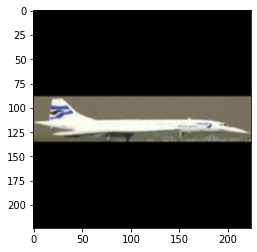

## Zero Centering

In [ ]:
# images, labels -> x_train, y_train, x_test, y_test로 split



In [ ]:
# trainset으로 mean_img 계산하고,
# testset은 trainset mean img로



In [ ]:
# 메모리 문제가 있다면 int8로 변환(근사값으로 사용)
zero_mean_img = zero_mean_img.astype('int8')

## 데이터 저장

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/LectureSpace/OpenDataset/pre_natural_imgs/' # 각자 원하는 드라이브 경로에 맞게 수정합시다.

In [ ]:
with open(folder_path+'x_train.pickle', 'wb') as f:
    pickle.dump(x_train, f)

In [ ]:
with open(folder_path+'y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f)

In [ ]:
with open(folder_path+'x_test.pickle', 'wb') as f:
    pickle.dump(x_test, f)

In [ ]:
with open(folder_path+'y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

## 데이터 다운로드(gdown)

`!gdown`
* 구글 드라이브에서 파일을 다운로드하는 명령어이다.



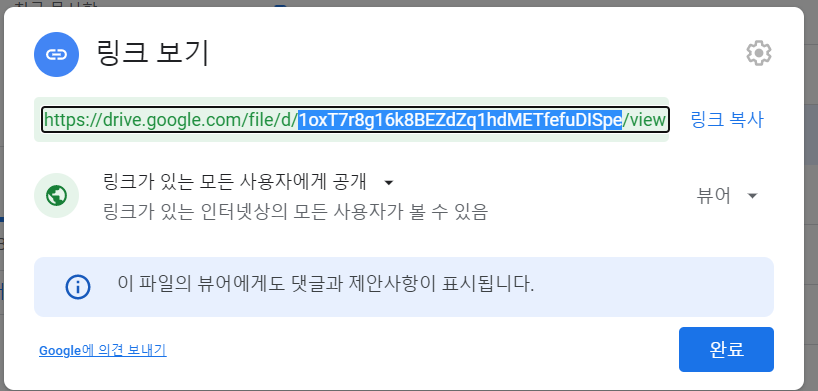

* gdown 뒤에 파일 아이디를 입력한다.
* 파일아이디는 파일 링크에서 d와 view 사이에 있는 문자에 해당한다.

In [ ]:
# x_train
!gdown 1uKn5KmcXMv4QUaIPz7wcc-my1mY1qrkk

# y_train
!gdown 11vtzegsqPhaLUMUhvkZ9lUNWDvcPWSVS

# x_test
!gdown 18KIm5cGTY1-Z-668dQx6simAKyzfMSnk

# y_test
!gdown 1MrQDy-Z6aPbDetbW0l_Kwcq48xd2A45k

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1uKn5KmcXMv4QUaIPz7wcc-my1mY1qrkk 

Downloading...
From: https://drive.google.com/uc?id=11vtzegsqPhaLUMUhvkZ9lUNWDvcPWSVS
To: /content/y_train.pickle
100% 125k/125k [00:00<00:00, 94.6MB/s]
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=18KIm5cGTY1-Z-668dQx6simAKyzfMSnk 

Downloading...
From: https://drive.google.com/uc?id=1MrQDy-Z6aPbDetbW0l_Kwcq48xd2A45k
To: /content/y_text.pickle
100% 11.2k/11.2k [00:00<00:00, 21.3MB/s]
